In [83]:
from bs4 import BeautifulSoup # for parsing and extracting value from requests's response
import requests # to make a HTTP request to certain URL
import pandas as pd # for data processing
import numpy as np # for math operations
import time # for timing the operations later in scrapping
import random # for generating random number
import nltk # for text processing
from wordcloud import WordCloud, STOPWORDS # for creating worcloud visualization
from nltk.sentiment import SentimentIntensityAnalyzer # for sentiment analysis
import matplotlib.pyplot as plt # for plotting data


pd.set_option('display.max_colwidth',None) # set display for pandas columns width
plt.style.use('ggplot') # set style for matplotlib chart

# Scrape Phone Specs

In [ ]:
# Create URL variable so that can easily be called later
# Don't forget to create headers IMPORTANT!

base_url = 'https://www.gsmarena.id/'
headers = {
'Accept':'*/*',
'Accept-Language':'id,en;q=0.9,en-GB;q=0.8,en-US;q=0.7',
'Cookie':'AEC=Ae3NU9OiuWVQT7dFhyPElqEoRacGPjT65AopViuKChN9IDBllqDIJWe2pg; SID=g.a000iAjO9NmaMCjKDHQkfW91b7ph0BpPfW9NM8iI6P2jmHLCrGX7NY_7r-0bGDDVPK4Op3EIUgACgYKAfQSAQASFQHGX2MiqWjJQzpi0ukbqFk3p6-2ExoVAUF8yKqHCCTXIWoD6f_8gWvSUxWj0076; __Secure-1PSID=g.a000iAjO9NmaMCjKDHQkfW91b7ph0BpPfW9NM8iI6P2jmHLCrGX7Q02tSpksVkeFYbcPRZrwTwACgYKAVISAQASFQHGX2MiSVZXNDDEfWEZ5r3WRRdP4BoVAUF8yKqhCD_lLOnBvRGvKfBcvgm70076; __Secure-3PSID=g.a000iAjO9NmaMCjKDHQkfW91b7ph0BpPfW9NM8iI6P2jmHLCrGX7otvtAXW86ow_62OFn-dpBQACgYKAWcSAQASFQHGX2Mij-qF2EMjSA3x6SzHWtaBTBoVAUF8yKpDUO5stx2B1FxwV018uMM00076; HSID=AnoiWEq-xDj2N3_3P; SSID=AYWMluqrHQKjwI-Lh; APISID=bsyQaFNzZhgplnlQ/A-ld160wSkvVjoidL; SAPISID=35O6u81qYSx9v_45/ApLmJ6jcg9jbcbZyr; __Secure-1PAPISID=35O6u81qYSx9v_45/ApLmJ6jcg9jbcbZyr; __Secure-3PAPISID=35O6u81qYSx9v_45/ApLmJ6jcg9jbcbZyr; NID=513=BzDD4Yil-JG-Kyb__D_8deueF9zUvFhX1FGZMSMY-R6k3Ar0ihZnp8nAN3LalhifChEjBHQSaKF5oSMIGHwv4MlJ9OxCNGI76CXJ2TgCA559NI8-yUVPAsxspCbBY9bjurpJWlqWfYfz_45SJkg9rbiClaItAzEDXhnhmOdVH-8eOAimDS2-r0XyDkTyKsAkUGLwofWe6JMpSybXAmt1D-4mDSFxeB32SJVLLPfHSnp_jr8sieTirvxfK80J7ptJ4xy0TT2ubFiTwohZmuSwIsaCGojOwWRmH5kYH0CQcvxVqIKlpiAIxKUmj5fWZOMqi94Eu3t7GPxBa1g; __Secure-1PSIDTS=sidts-CjIB7F1E_Hyt5KG9lXCtn6pZe6S1AmMlj-Q4gWWNjaEslgZo7D709YjYOoHislHWwc9bQRAA; __Secure-3PSIDTS=sidts-CjIB7F1E_Hyt5KG9lXCtn6pZe6S1AmMlj-Q4gWWNjaEslgZo7D709YjYOoHislHWwc9bQRAA; OGPC=19010599-1:19011583-1:; OGP=-19010599:-19011583:; DV=o9yiE6fVZS9d0KXi2U5DAWIhLUwe6thjFs55AWIZeAAAAEBL1W1MikEpVgAAAOBRX6N8aZALRQAAALwkxYOqKaGkFwAAAA; UULE=a+cm9sZTogMQpwcm9kdWNlcjogMTIKdGltZXN0YW1wOiAxNzEyMTEzMTE1ODEwMDAwCmxhdGxuZyB7CiAgbGF0aXR1ZGVfZTc6IC02OTcxNDAwMAogIGxvbmdpdHVkZV9lNzogMTEwNDI1NDAwMAp9CnJhZGl1czogNDUxOTU2NDQwCnByb3ZlbmFuY2U6IDYK; SIDCC=AKEyXzXSlJOTX8psC94ZNMwZmnN3YWjyaDr5OR2VkyD6jCmyxZSkbafuhD8yTG83p-MRPkPsIXU; __Secure-1PSIDCC=AKEyXzX5d2p9wKHT6IyXTZc4wCRl8t8RDfpcFW4nw8toleGLkDcL_41cvooYJIxqnAwkX9hq3JY; __Secure-3PSIDCC=AKEyXzWgFvoEWKW_rS4FWY3lUi_ray42A7kWEY8HWeXjL9hEBUeD2-TR24xlw4JDOVJs5PguuMI',
'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 Edg/123.0.0.0',
'Cache-Control': 'max-age=0',
'Connection': 'keep-alive',
'Upgrade-Insecure-Requests': '1',
}

In [ ]:
# Start a requests to URL variable and create variable content
res = requests.get(base_url,headers=headers)
html = res.content

# Parsed the content using BeautifulSoup
htmlParsed = BeautifulSoup(html,'html.parser')
merk = htmlParsed.find('ul',attrs={"class": "columns"})

# Looping through the parsed html to find all the anchor elements ('a') and insert it to empty list
link_merk = []
for a in merk.find_all('a'):
  link_merk.append(a['href'])

In [ ]:
# Empty list to catch the content from looping later
products = []
link_prods = []

# Looping through the list of link_merk created earlier and repeat the same processes
for url in link_merk:
  # Start a requests to URL variable and create variable content
  resp = requests.get(url)
  htmldata = resp.content
  # Parsed the content using BeautifulSoup
  parsed = BeautifulSoup(htmldata,'html.parser')
  prod = parsed.find('ul',attrs={"class":"vs-ki"})
  # Set the sleep time so it doesn't look much like robot
  sleepTime = random.uniform(1, 10)
  time.sleep(sleepTime)
  # Same process
  product = []
  link_prod = []
  # Nested loop to find certain elements
  for a in prod.find_all('a'):
      product.append(a['title'])
      link_prod.append(a['href'])
  # Insert values / list of product & link product to first 2 empty list on top
  products.append(product)
  link_prods.append(link_prod)

In [ ]:
# Flatten the products & link prods list
all_prod = []
all_link = []
for a in products:
  for b in a:
    all_prod.append(b)
for a in link_prods:
  for b in a:
    all_link.append(b)

In [ ]:
# Create dataframe using pandas from to lists above
df = pd.DataFrame()
df['products'] = pd.Series(all_prod)
df['linkProducts'] = pd.Series(all_link)

In [ ]:
# Create URL for another Looping later
base = 'https://www.gsmarena.id'
df['linkProducts'] = base+df['linkProducts']

In [ ]:
specs = []
# Looping through the products link to extract the specifications info
for link in df['linkProducts']:
  # Same process
  response = requests.get(link,headers=headers,allow_redirects=False)

  htmlData = response.content
  parsedHtml = BeautifulSoup(htmlData,'html.parser')

  # Find a table element from the content
  table = parsedHtml.find('tbody')
  time.sleep(sleepTime)
  # Empty list to catch values from the scraped table
  spek = []
  # Extract all values from the table
  for x in table.find_all('td'):
    spek.append(x)

  # Create a dictionary or key, value pair from the spek list based on nth spek element
  #  if the nth element is odd than it is key, if the nth element is even then it is value
  key = []
  val = []
  for x in range(len(spek)):
    if x % 2 == 0:
      key.append(spek[x])
    else:
      val.append(spek[x])

  spesifikasi = {k.text:v.text for k,v in zip(key,val)}
  # Insert those dictionaries into specs list
  specs.append(spesifikasi)

In [ ]:
# add new column to the dataframe which contains specs list
df['specifications'] = pd.Series(specs)

In [ ]:
# Empty list to catch the values from flatten dictionaries
announce = []
launch = []
price = []
network = []
dimension = []
weight = []
battery = []
screen = []
resolution = []
storage = []
os = []
chipset = []
cpu = []
gpu = []
maincam = []
frontcam = []
nfc = []
usb = []

In [ ]:
# Looping through the dictionaries to insert the value into certain list
for x in df['specifications'].values:
  # Using try & exception to handle error, if certain key doesn't exist within dictionary it will insert empty string
  try:
    announce.append(x['Diumumkan'])
  except:
    announce.append('')
  try:
    launch.append(x['Status'])
  except:
    launch.append('')
  try:
    price.append(x['Expected Price'])
  except:
    price.append('')
  try:
    network.append(x['Teknologi'])
  except:
    network.append('')
  try:
    dimension.append(x['Dimensi'])
  except:
    dimension.append('')
  try:
    weight.append(x['Berat'])
  except:
    weight.append('')
  try:
    battery.append(x['Tipe'])
  except:
    battery.append('')
  try:
    screen.append(x['Ukuran'])
  except:
    screen.append('')
  try:
    resolution.append(x['Resolusi'])
  except:
    resolution.append('')
  try:
    storage.append(x['Internal'])
  except:
    storage.append('')
  try:
    os.append(x['Os'])
  except:
    os.append('')
  try:
    chipset.append(x['Chipset'])
  except:
    chipset.append('')
  try:
    cpu.append(x['Cpu'])
  except:
    cpu.append('')
  try:
    gpu.append(x['Gpu'])
  except:
    gpu.append('')
  try:
    maincam.append(x['Dual'])
  except:
    maincam.append('')
  try:
    frontcam.append(x['Single'])
  except:
    frontcam.append('')
  try:
    nfc.append(x['Nfc'])
  except:
    nfc.append('')
  try:
    usb.append(x['Usb'])
  except:
    usb.append('')

In [ ]:
# Create columns from the list above
df['annouced'] = pd.Series(announce)
df['launch'] = pd.Series(launch)
df['price'] = pd.Series(price)
df['network'] = pd.Series(network)
df['dimension'] = pd.Series(dimension)
df['weight'] = pd.Series(weight)
df['battery'] = pd.Series(battery)
df['screen'] = pd.Series(screen)
df['resolution'] = pd.Series(resolution)
df['storage'] = pd.Series(storage)
df['os'] = pd.Series(os)
df['chipset'] = pd.Series(chipset)
df['cpu'] = pd.Series(cpu)
df['gpu'] = pd.Series(gpu)
df['maincam'] = pd.Series(maincam)
df['frontcam'] = pd.Series(frontcam)
df['nfc'] = pd.Series(nfc)
df['usb'] = pd.Series(usb)

In [ ]:
# save it to CSV

# uncomment & run line of code below to save the data into csv
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - Smartphone/gsmarena.csv',index=False)

# Scrape Reviews

In [ ]:
# create variable for target url
urls = ['https://www.gsmarena.com/infinix_hot_40_pro-reviews-12733.php']

In [ ]:
# looping for pagination since i don't use selenium
for i in range(2,9):
  urls.append(f'https://www.gsmarena.com/infinix_hot_40_pro-reviews-12733p{i}.php')

In [ ]:
reviews = [] # empty variable to store the value of for loop
for url in urls: # loop through the target url
  r = requests.get(url) # make a request to url and the value obtained is called response
  res = r.content # here is the response content
  parser = BeautifulSoup(res,'html.parser') # parsed into html using BeautifulSoup
  comments = parser.find_all('p',attrs={'class':'uopin'}) # using find_all method to find the tag and class containing comment text
  for comment in comments: # for loop to loop through comments tag
    reviews.append(comment.text) # insert only the text from comments value to empty list that has been created earlier

In [ ]:
len(reviews) # check the number of comments scrapped

149

In [ ]:
dfr = pd.DataFrame(reviews,columns=['reviews']) # create dataframe to make it easier for cleaning process later

In [ ]:
# Define functions for cleaning the text comments
def clean_username(text):
  if text.find('2024') < 0: # this take the text and if not find the '2024' text it will return the original text
    return text
  else:  # and this if the text is containing word '2024' it will skip couple of words containing username and date
    return text[text.find('2024')+4:]
def clean_replies(text):
  if text.find('...') < 0: # this to find unfinished sentences same as before if it doesn't find '...' it will return the original text
    return text
  else:
    return text[text.find('...')+8:] # and if it finds '...' it will skips the sentence before the '...'

In [ ]:
dfr['reviews'] = dfr['reviews'].apply(clean_username) # apply the first function
dfr['reviews'] = dfr['reviews'].apply(clean_replies) # apply the second function
dfr['reviews'] = dfr['reviews'].str.lower() # make all the text to be lowercase
dfr['reviews'] = dfr['reviews'].str.replace('\n','') # delete all newlines for each comment or review
dfr['reviews'] = dfr['reviews'].str.strip() # delete whitespaces in the begining or ending of each comment or review
dfr['reviews'] = dfr['reviews'].str.replace('.','').str.replace("'",'') # delete all the period and single quote
dfr['reviews'] = dfr['reviews'].replace(r'[^\w]',' ',regex=True) # delete all the symbols
dfr['reviews'] = dfr['reviews'].str.replace('  ',' ') # replace the double spaces with single space

In [ ]:
# save the file as csv
dfr.to_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - Smartphone/reviews.csv',index=False)

# Sentiment Analysis

In [1]:
path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - Smartphone/' # initiate the path to the working directory

In [33]:
df = pd.read_csv(f'{path}reviews.csv') # read the csv file from working directory
df = df.dropna().reset_index(drop=True) # drop the null values from the data

In [10]:
nltk.download('vader_lexicon') # download the VADER package for SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer() # define the SentimentIntensityAnalyzer as sia

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [34]:
df = df.reset_index().rename(columns={'index':'id'}) # resetting index for purpose of creating unique identifier
df['id'] = df['id'].apply(lambda x: x+1) # the value start from 1 instead of 0

In [36]:
res = {} # initiate empty dictionary for saving the value from for loop
for x in range(len(df)): # loop through the data frame
  rev = df['reviews'][x]
  id = df['id'][x]

  res[id] = sia.polarity_scores(rev) # insert value to the dictionary

In [39]:
review = pd.DataFrame(res).T # create data frame from the dictionary
review = review.reset_index().rename(columns={'index':'id'}) # reset index to create unique identifier

# merge the two data frames it's like JOIN in SQL
df = df.merge(review,how='left') # this merge method will automatically find the similar columns between two dfs to merge on

In [52]:
""" Create a function
    that return positive if the compound value is positive
    or if the compound value is 0 then it will return Neutral
    and if the compound value is nrgative then it will return Negative
    compound values vary from -1 to 1"""

def sentiments(c):
  if c > 0:
    return 'Positive'
  elif c == 0:
    return 'Neutral'
  else:
    return 'Negative'

In [54]:
df['sentiment'] = df['compound'].apply(sentiments) # apply the function to the data frame's column

sentimen = df['sentiment'].value_counts().reset_index() # create a new data frame from value_counts method to create visualizaton

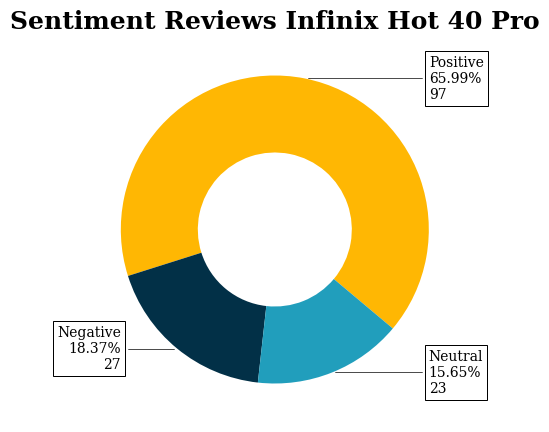

In [102]:
plt.rcParams["font.family"] = "DejaVu Serif" # Set font family
plt.rcParams["font.serif"] = ["Times New Roman"] # Set font to Times New Roman

labels= sentimen['sentiment']
values = sentimen['count']
pallete = ['#ffb703','#023047','#219ebc']

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal")) # define the matplotlib figure
wedges, texts = ax.pie(values, wedgeprops=dict(width=0.5), startangle=-40, colors=pallete) # create the pie

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72) # initiate bbox for annotation later
kw = dict(arrowprops=dict(arrowstyle="-",color='black'),
          bbox=bbox_props, zorder=0, va="center") # create **kwargs for connection line

for i, p in enumerate(wedges): # loop through the components of pie
    ang = (p.theta2 - p.theta1)/2. + p.theta1 # calculate the angle using theta
    y = np.sin(np.deg2rad(ang)) # calculate sin for angle in radians
    x = np.cos(np.deg2rad(ang)) # calculate cosine for angle in radians
     # horizontal alignment for annotation it doesn't have to be complicated like this it can be as simple as 'center'
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}" # define the angle for connection line
    kw["arrowprops"].update({"connectionstyle": connectionstyle}) # update the **kwargs dictionary by inserting connection line angle

    # annotation for percentage, label, and values
    # as well as the position of the annotation text
    ax.annotate(f'{labels[i]}\n{round((values[i]/sum(values))*100,2)}%\n{values[i]}', xy=(x, y), xytext=(np.sign(x), y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Sentiment Reviews Infinix Hot 40 Pro",fontweight='bold',fontsize=18,ha='center') # set the title of the chart
# plt.savefig(f'{path}/sentimentreviews.png',bbox_inches='tight') # save the chart
plt.show()

In [69]:
reviews_word = '' # define the empty string to store all the reviews from for loop
for x in df['reviews']:
  token = x.split()
  reviews_word += " ".join(token)+" " # store the reviews to be one big sentence

In [79]:
stopwords = set(STOPWORDS) # set the stopwords to remove the stopwords
# stopwords are words with less meaning in sentences like 'a','the','is' and etc.
# check here https://kavita-ganesan.com/what-are-stop-words/ to know more about stopwords

# generate wordcloud using WordCloud from wordcloud package
wordcloud = WordCloud(background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(reviews_word)

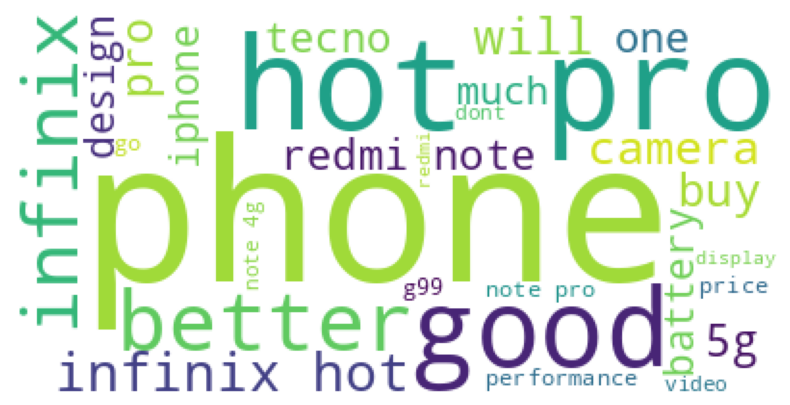

In [82]:
# Plot the wordcloud generated earlier using matplotlib imshow
plt.figure(figsize = (8, 12), facecolor = None) # define the figure and its size
plt.imshow(wordcloud) # show the wordcloud
plt.axis("off") # turn off the axis
plt.tight_layout()
# plt.savefig(f'{path}wordcloud.png',bbox_inches='tight',dpi=300) # save the fig
plt.show()